In [1]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Point = namedtuple("Point", ["x", "y"])

In [3]:
class Generation:
    def __init__(self, points):
        self.points = set(points)
        self._init_bounds()
    
    def _init_bounds(self):
        xmin, xmax = 0, 0
        ymin, ymax = 0, 0
        for p in self.points:
            if p.x < xmin: 
                xmin = p.x
            if p.x > xmax:
                xmax = p.x
            if p.y < ymin:
                ymin = p.y
            if p.y > ymax:
                ymax = p.y
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        
    def print_grid(self, buffer=1):
        for y in range(self.ymin-buffer, self.ymax+1+buffer):
            for x in range(self.xmin-buffer, self.xmax+1+buffer):
                p = Point(x, y)
                if p in self.points:
                    print("#", end="")
                else:
                    print(".", end="")
            print()

    def neighbors(self, point):
        out = set()
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if i == 0 and j == 0:
                    continue
                out.add(Point(point.x+i, point.y+j))
        return out
    
    def next_gen(self):
        out = []
        b = 1
        for y in range(self.ymin-b, self.ymax+1+b):
            for x in range(self.xmin-b, self.xmax+1+b):
                p = Point(x,y)
                ns = self.neighbors(p)
                if len(ns.intersection(self.points)) >= 3:
                    out.append(p)
        return Generation(out)

gen1 = Generation([Point(0,1), Point(-1,0), Point(0,0), Point(1,0), Point(0,-1)])
gen1.print_grid()

.....
..#..
.###.
..#..
.....


In [4]:
gen1.neighbors(Point(4,5))

{Point(x=3, y=4),
 Point(x=3, y=5),
 Point(x=3, y=6),
 Point(x=4, y=4),
 Point(x=4, y=6),
 Point(x=5, y=4),
 Point(x=5, y=5),
 Point(x=5, y=6)}

In [5]:
g = gen1
d = [[1, 5]]
for i in range(2, 101):
    g = g.next_gen()
    print("gen {} (points={})".format(i, len(g.points)))
    d.append([i, len(g.points)])
    #g.print_grid()
    
df = pd.DataFrame(d, columns=["gen", "points"])

gen 2 (points=9)
gen 3 (points=13)
gen 4 (points=21)
gen 5 (points=29)
gen 6 (points=37)
gen 7 (points=49)
gen 8 (points=61)
gen 9 (points=73)
gen 10 (points=89)
gen 11 (points=105)
gen 12 (points=121)
gen 13 (points=141)
gen 14 (points=161)
gen 15 (points=181)
gen 16 (points=205)
gen 17 (points=229)
gen 18 (points=253)
gen 19 (points=281)
gen 20 (points=309)
gen 21 (points=337)
gen 22 (points=369)
gen 23 (points=401)
gen 24 (points=433)
gen 25 (points=469)
gen 26 (points=505)
gen 27 (points=541)
gen 28 (points=581)
gen 29 (points=621)
gen 30 (points=661)
gen 31 (points=705)
gen 32 (points=749)
gen 33 (points=793)
gen 34 (points=841)
gen 35 (points=889)
gen 36 (points=937)
gen 37 (points=989)
gen 38 (points=1041)
gen 39 (points=1093)
gen 40 (points=1149)
gen 41 (points=1205)
gen 42 (points=1261)
gen 43 (points=1321)
gen 44 (points=1381)
gen 45 (points=1441)
gen 46 (points=1505)
gen 47 (points=1569)
gen 48 (points=1633)
gen 49 (points=1701)
gen 50 (points=1769)
gen 51 (points=1837)
gen 

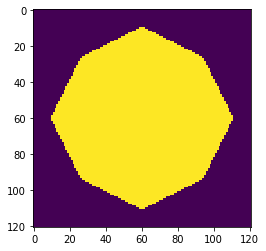

In [7]:
def as_array(grid, xmin=None, xmax=None, ymin=None, ymax=None):
    if xmin is None:
        xmin = grid.xmin
    if xmax is None:
        xmax = grid.xmax
    if ymin is None:
        ymin = grid.ymin
    if ymax is None:
        ymax = grid.ymax
    data = []
    for y in range(ymin, ymax+1):
        data.append([])
        for x in range(xmin, xmax+1):
            p = Point(x,y)
            if p in grid.points:
                data[-1].append(1)
            else:
                data[-1].append(0)
    return np.array(data)
        
plt.imshow(as_array(g, -60, 60, -60, 60))
plt.show()

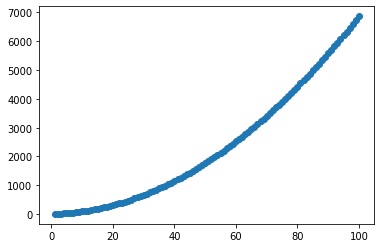

In [50]:
plt.scatter(df["gen"], df["points"])
plt.show()

In [10]:
np.__version__

'1.16.4'

In [9]:
np

<module 'numpy' from '/home/mzimmerman/local/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>

In [33]:
p = np.polynomial.polynomial.polyfit(df["gen"][:], df["points"][:], 2)

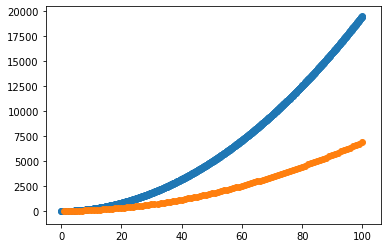

In [34]:
x = np.arange(0, 100, 0.1)
plt.scatter(x, [np.polyval(p, i) for i in x])
plt.scatter(df["gen"], df["points"])
#plt.xlim([0, 20])
#plt.ylim([0, 1000])

In [35]:
df["gen"][:]

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
     ... 
70     71
71     72
72     73
73     74
74     75
75     76
76     77
77     78
78     79
79     80
80     81
81     82
82     83
83     84
84     85
85     86
86     87
87     88
88     89
89     90
90     91
91     92
92     93
93     94
94     95
95     96
96     97
97     98
98     99
99    100
Name: gen, Length: 100, dtype: int64